#### 비지도학습
##### 1. 군집화
* 비지도학습은 데이터의 구조를 파악해서 그룹핑을 하거나 차원을 축소하거나 할 때 사용하는 학습방식
* 1. 클러스터링 : 비슷한 유형의 데이터들을 그룹핑 해주는 학습방법
* 2. 클러스터링을 지원하는 알고리즘은 K-Means 가 있다.

##### 2. 차원축소
* 비지도 학습을 통해서 데이터를 변환하는 방식
* 데이터를 변환(차원축소)하는 이유는?
    - 데이터를 시각화하거나, 데이터를 압축, 지도학습에 사용하기 위해서 정보가 더 잘나타나도록 하기 위해서이다.
* 차원축소를 지원하는 알고리즘은 PCA(Principal Component Analysis)가 있다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

# %matplotlib inline

In [2]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris.target_names)
iris.target

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(iris.data.shape)
print(iris.feature_names)
iris.data

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris_df = pd.DataFrame(data=iris.data, \
                        columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# Model 생성 - Kmeans 알고리즘 사용
model = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=0)
model.fit(iris_df)
model

KMeans(max_iter=500, n_clusters=3, random_state=0)

In [22]:
# 군집화된 결과 확인
print(model.labels_)
print(model.inertia_)

[2 0 0 0 2 2 0 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 0 0 2
 2 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
503.2840428152491


In [31]:
# 군집화한 결과(labels_) 를 cluster라는 컬럼으로 추가
iris_df['cluster'] = model.labels_
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster,target
0,5.1,3.5,1.4,0.2,2,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,2,0


In [32]:
# target 값으로 target 컬럼을 추가
iris_df['target'] = iris.target
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster,target
0,5.1,3.5,1.4,0.2,2,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,2,0


### Intertia value를 이용한 적정 군집수 판단
* Intertia value는 중심점(centroid)에서 데이터간의 거리를 합산한 값이며, 군집의 응집도를 나타내는 값이다. 이 값이 작을수록 응집도가 높게 군집화가 잘 되었다는 의미
* 1 ~ 6개의 클러스터로 클러스터링을 했을 때 각 클러스터 객수별로 interia value를 출력해보기
* itertia 값(클러스터 값)이 3 ~ 5 사이에서 급격하게 하강하면서 변화의 폭이 크지 않다는 것을 알 수 있으므로 iris 데이터는 3 ~ 5 개의 클러스터로 분류하는 것이 적당하다고 판단하는 것.

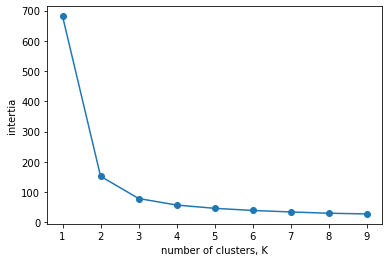

In [18]:
import matplotlib.pyplot as plt
ks = range(1,10)
intertias_values = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(iris_df)
    intertias_values.append(model.inertia_)

print(intertias_values)

plt.plot(ks, intertias_values, '-o')
plt.xlabel('number of clusters, K')
plt.ylabel('intertia')
plt.xticks(ks)
plt.show()

#### 크로스 테이블 체크
* Cross Tabulation은 테이블 형태로 교차분석한 결과
* Pandas의 .crosstab 함수를 사용한다.

In [36]:
cross_tab = pd.crosstab(iris_df['target'], iris_df['cluster'])
cross_tab

cluster,0,1,2
target,,,
0,19,0,31
1,10,40,0
2,15,35,0


#### 차원축소
* 차원축소 한 데이터를 시각화하기

In [48]:
from sklearn.decomposition import PCA

model = PCA(n_components=2, random_state=0) # 차원을 2차원으로 축소
pca_transformed = model.fit_transform(iris.data)
print(type(pca_transformed))
pca_transformed

<class 'numpy.ndarray'>


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [49]:
# 2차원으로 변환된 데이터를 pca_x, pca_y 라는 컬럼명으로 추가
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,2,0,-2.728717,0.326755


In [53]:
# cluster 별로 0,1,2 경우마다 index 추출
marker0_index = iris_df[iris_df['cluster'] == 0].index
print(marker0_index)
marker1_index = iris_df[iris_df['cluster'] == 1].index
print(marker1_index)
marker2_index = iris_df[iris_df['cluster'] == 1].index
print(marker2_index)

Int64Index([  1,   2,   3,   6,   8,   9,  12,  13,  22,  25,  29,  30,  34,
             35,  38,  41,  42,  45,  47,  57,  60,  68,  70,  72,  79,  81,
             83,  93,  98, 101, 111, 113, 114, 119, 121, 123, 126, 127, 133,
            134, 138, 142, 146, 149],
           dtype='int64')
Int64Index([ 50,  51,  52,  53,  54,  55,  56,  58,  59,  61,  62,  63,  64,
             65,  66,  67,  69,  71,  73,  74,  75,  76,  77,  78,  80,  82,
             84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  97,
             99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 115,
            116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135,
            136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
           dtype='int64')
Int64Index([ 50,  51,  52,  53,  54,  55,  56,  58,  59,  61,  62,  63,  64,
             65,  66,  67,  69,  71,  73,  74,  75,  76,  77,  78,  80,  82,
             84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  97,


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Component')

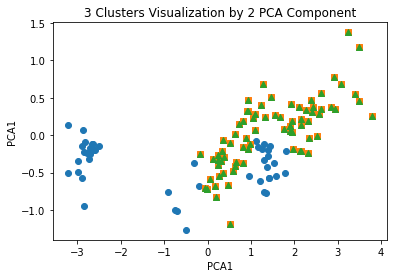

In [66]:
# cluster 값이 0,1,2에 해당하는 index와 pca_x 값을 X축에 설정
# cluster 값이 0,1,2에 해당하는 index와 pca_y 값을 Y축에 설정
# marker o, s, ^를 사용
# iris_df.loc[marker0_index, 'pca_x']
plt.scatter(x=iris_df.loc[marker0_index, 'pca_x'], \
            y=iris_df.loc[marker0_index, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[marker1_index, 'pca_x'], \
            y=iris_df.loc[marker1_index, 'pca_y'], marker='s')

plt.scatter(x=iris_df.loc[marker2_index, 'pca_x'], \
            y=iris_df.loc[marker2_index, 'pca_y'], marker='^')

plt.xlabel('PCA1')
plt.ylabel('PCA1')
plt.title('3 Clusters Visualization by 2 PCA Component')

### Wheat Seed Dataset 활용한 군집화

In [38]:
col_names = ['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kerneal.Groove', 'Type']
wheat_df = pd.read_csv('data/seeds_dataset.txt', delimiter='\t')
wheat_df.columns = col_names
print(wheat_df.shape)
wheat_df.head()

(209, 8)


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kerneal.Groove,Type
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [41]:
wheat_df['Type'].value_counts()

3    70
2    70
1    69
Name: Type, dtype: int64

In [42]:
feature_df = wheat_df.drop(columns=['Type'], axis=1, inplace=False)
print(feature_df.columns)
feature_df.head()

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kerneal.Groove'],
      dtype='object')


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kerneal.Groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956


In [43]:
# KMeans 모델 생성
model = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=0)
# 학습하기
model.fit(feature_df)

KMeans(max_iter=500, n_clusters=3, random_state=0)

In [46]:
print(model.labels_)
wheat_df['cluster'] = model.labels_
wheat_df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kerneal.Groove,Type,cluster
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0


In [45]:
model.inertia_

586.565287063636

In [47]:
wheat_group = wheat_df.groupby(['Type', 'cluster'])['Area'].count()
wheat_group

Type  cluster
1     0          59
      1           1
      2           9
2     0          10
      1          60
3     0           2
      2          68
Name: Area, dtype: int64

In [67]:
wheat_df['cluster'].value_counts()

2    77
0    71
1    61
Name: cluster, dtype: int64

In [74]:
print(type(feature_df.values))
pca_data = feature_df.values
# 몇차원인지 확인하는 속성
print(pca_data.ndim)
pca_data

<class 'numpy.ndarray'>
2


array([[14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955, ...,  3.379 ,  2.259 ,  4.805 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [77]:
# 모델생성
pca_model = PCA(n_components=2, random_state=0)
# 학습하기 2개의 컴포넌트로 차원 축소
pca_transformed = pca_model.fit_transform(pca_data)
pca_transformed

array([[ 3.17422899e-01, -2.69603847e+00],
       [-6.57924900e-01, -1.13787002e+00],
       [-1.05295715e+00, -1.62734346e+00],
       [ 1.62202629e+00, -2.19095193e+00],
       [-4.74469260e-01, -1.34296772e+00],
       [-1.81748440e-01, -1.56982620e-01],
       [-7.78051856e-01, -1.13612752e+00],
       [ 2.28457489e+00, -1.36804771e+00],
       [ 1.98093147e+00, -1.50248681e+00],
       [ 3.72742573e-01,  8.79894199e-01],
       [-7.08953885e-01, -2.11298931e+00],
       [-1.21050506e+00,  8.87589861e-02],
       [-1.16631714e+00, -7.48966649e-01],
       [-1.19006521e+00, -9.59236659e-01],
       [-5.04819810e-01,  3.71623509e-01],
       [-1.37084109e+00,  1.31689377e+00],
       [ 1.05937860e+00, -2.02289842e+00],
       [-1.48853908e-01, -2.02895653e+00],
       [-2.45920815e+00,  6.83018235e-02],
       [-6.28548215e-01, -7.24621749e-01],
       [-6.87109428e-01, -1.11822547e+00],
       [ 1.40939142e+00, -2.81402090e+00],
       [-2.84088638e+00, -2.67422056e+00],
       [ 4.

In [78]:
wheat_df['pca_x'] = pca_transformed[:,0]
wheat_df['pca_y'] = pca_transformed[:,1]
wheat_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kerneal.Groove,Type,cluster,pca_x,pca_y
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0,0.317423,-2.696038
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0,-0.657925,-1.137870
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0,-1.052957,-1.627343
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0,1.622026,-2.190952
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0,-0.474469,-1.342968


Text(0.5, 1.0, 'Wheat Data 3 Clusters Visualization by 2 PCA Component')

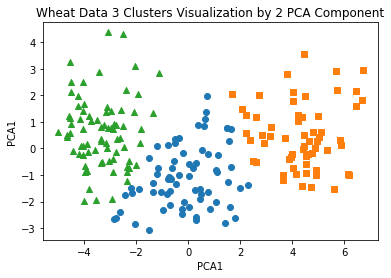

In [80]:
marker0_index = wheat_df[wheat_df['cluster'] == 0].index
marker1_index = wheat_df[wheat_df['cluster'] == 1].index
marker2_index = wheat_df[wheat_df['cluster'] == 2].index

plt.scatter(x=wheat_df.loc[marker0_index, 'pca_x'], \
            y=wheat_df.loc[marker0_index, 'pca_y'], marker='o')
plt.scatter(x=wheat_df.loc[marker1_index, 'pca_x'], \
            y=wheat_df.loc[marker1_index, 'pca_y'], marker='s')
plt.scatter(x=wheat_df.loc[marker2_index, 'pca_x'], \
            y=wheat_df.loc[marker2_index, 'pca_y'], marker='^')

plt.xlabel('PCA1')
plt.ylabel('PCA1')
plt.title('Wheat Data 3 Clusters Visualization by 2 PCA Component')